<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Junho_2020/blob/master/ANN_segmentacao_tensor_OUR_v10_junho_02_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage


In [2]:
!pip install mahotas

In [0]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [7]:
labels = []
images = []
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    #images.append(skimage.data.imread(f))
    images.append(cv2.imread(f))
    labels.append(f)
 # labels.append(int(d))\
'''
 with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
'''

'\n with zipfile.ZipFile(Transfere, "r") as f:\n    for name in f.namelist():\n      img_name.append(name)\n      #xw.append(cv2.imread(name))\n'

In [8]:
print(labels)
#print(images)
np.array(images).shape

['Q6-1-2-G1.jpg', 'Q6-1-2-G10.jpg', 'Q6-1-2-G11.jpg', 'Q6-1-2-G12.jpg', 'Q6-1-2-G13.jpg', 'Q6-1-2-G14.jpg', 'Q6-1-2-G15.jpg', 'Q6-1-2-G16.jpg', 'Q6-1-2-G17.jpg', 'Q6-1-2-G18.jpg', 'Q6-1-2-G19.jpg', 'Q6-1-2-G2.jpg', 'Q6-1-2-G20.jpg', 'Q6-1-2-G3.jpg', 'Q6-1-2-G4.jpg', 'Q6-1-2-G5.jpg', 'Q6-1-2-G6.jpg', 'Q6-1-2-G7.jpg', 'Q6-1-2-G8.jpg', 'Q6-1-2-G9.jpg', 'Q6-1-2-V1.jpg', 'Q6-1-2-V2.jpg', 'Q6-1-2-V3.jpg', 'Q6-1-2-V4.jpg', 'Q6-1-2-V5.jpg', 'Q6-1-2-V6.jpg', 'Q6-1-4-B1.jpg', 'Q6-1-4-B10.jpg', 'Q6-1-4-B2.jpg', 'Q6-1-4-B3.jpg', 'Q6-1-4-B4.jpg', 'Q6-1-4-B5.jpg', 'Q6-1-4-B6.jpg', 'Q6-1-4-B7.jpg', 'Q6-1-4-B8.jpg', 'Q6-1-4-B9.jpg', 'Q6-1-4-G1.jpg', 'Q6-1-4-G10.jpg', 'Q6-1-4-G2.jpg', 'Q6-1-4-G3.jpg', 'Q6-1-4-G4.jpg', 'Q6-1-4-G5.jpg', 'Q6-1-4-G6.jpg', 'Q6-1-4-G7.jpg', 'Q6-1-4-G8.jpg', 'Q6-1-4-G9.jpg', 'Q6-1-4-I1.jpg', 'Q6-1-4-I10.jpg', 'Q6-1-4-I2.jpg', 'Q6-1-4-I3.jpg', 'Q6-1-4-I4.jpg', 'Q6-1-4-I5.jpg', 'Q6-1-4-I6.jpg', 'Q6-1-4-I7.jpg', 'Q6-1-4-I8.jpg', 'Q6-1-4-I9.jpg', 'Q6-1-4-V1.jpg', 'Q6-1-4-V2.jpg',

(882,)

In [9]:
'''
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")
'''

'\nww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)\nplt.axis("off")\nplt.imshow(ww[10], cmap = "gray")\n'

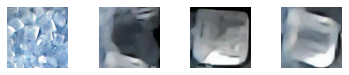

In [10]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [0]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [0]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

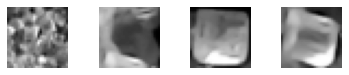

In [13]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [14]:
y_valor=[]

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [0]:
#sparse_softmax_cross_entropy_with_logits()

In [16]:
'''
# Import 'tensorflow'
import tensorflow as tf 

# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)
'''

"\n# Import 'tensorflow'\nimport tensorflow as tf \n\n# Initialize placeholders \nx = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])\ny = tf.placeholder(dtype = tf.int32, shape = [None])\n\n# Flatten the input data\nimages_flat = tf.contrib.layers.flatten(x)\n"

In [17]:
'''
W_train, W_test, yw_train, yw_test = train_test_split(np.array(ww), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)
'''                                          

'\nW_train, W_test, yw_train, yw_test = train_test_split(np.array(ww), np.array(y_valor), \n                                                    test_size=0.30, \n                                                    random_state=42)\n'

In [0]:

W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [19]:
print(len(yw_train))
print(len(yw_test))

617
265


In [0]:
train_images=W_train
train_labels=yw_train
test_images=W_test
test_labels=yw_test

In [21]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
''''''

''

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 1.4571 - accuracy: 0.4489
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 1.0360 - accuracy: 0.5818
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.9425 - accuracy: 0.6353
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8303 - accuracy: 0.6759
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7700 - accuracy: 0.7018
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7385 - accuracy: 0.7066
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.7050
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.7018
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.7407
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.7472


In [0]:
#print(type(train_images))
#print(train_images[2])

In [25]:
predictions = model.predict(train_images) #x_test[:3])
print('predictions shape:', predictions.shape)

predictions shape: (617, 10)


In [26]:
print(predictions)

[[ -3.8108265   7.2341614   5.8262076 ...  -6.4449763  -4.013649
   -4.554341 ]
 [ -4.1136737  10.5248      5.929271  ...  -7.8146577  -4.3132863
   -5.2447453]
 [ -6.263322    7.699488   10.040244  ... -10.628603   -7.3545427
   -7.8006587]
 ...
 [ -3.5152938  10.139473    5.2458577 ...  -7.2125244  -3.7568185
   -4.610212 ]
 [ -4.546432    8.778826    6.3252196 ...  -7.63855    -4.911031
   -5.243894 ]
 [ -3.07392     1.7831135   3.9696474 ...  -4.554593   -3.3182933
   -3.4876301]]


In [27]:
print(train_images.shape)

(617, 28, 28)


In [28]:
#print(train_images[0])
result = model.evaluate(train_images) # esta estranho
print(result)
result = model.predict(train_images) # esta estranho
print(result)

20/20 [==============================] - 0s 964us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]
[[ -3.8108265   7.2341614   5.8262076 ...  -6.4449763  -4.013649
   -4.554341 ]
 [ -4.1136737  10.5248      5.929271  ...  -7.8146577  -4.3132863
   -5.2447453]
 [ -6.263322    7.699488   10.040244  ... -10.628603   -7.3545427
   -7.8006587]
 ...
 [ -3.5152938  10.139473    5.2458577 ...  -7.2125244  -3.7568185
   -4.610212 ]
 [ -4.546432    8.778826    6.3252196 ...  -7.63855    -4.911031
   -5.243894 ]
 [ -3.07392     1.7831135   3.9696474 ...  -4.554593   -3.3182933
   -3.4876301]]


In [0]:
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
# img = img_as_float(astronaut()[::2, ::2])

Transfere='Fotos_Grandes_3cdAmostra.zip'
#Nome='Q6-1-4.jpg'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
#img=cv2.imread(Nome)

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
img=ww[0]

In [32]:
print(img.shape)

(1200, 1200)


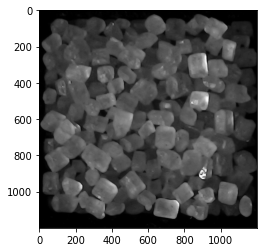

In [33]:
plt.imshow(img, cmap = "gray")

In [0]:
a=0
b=1200
c=100
d=200
Num=50
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


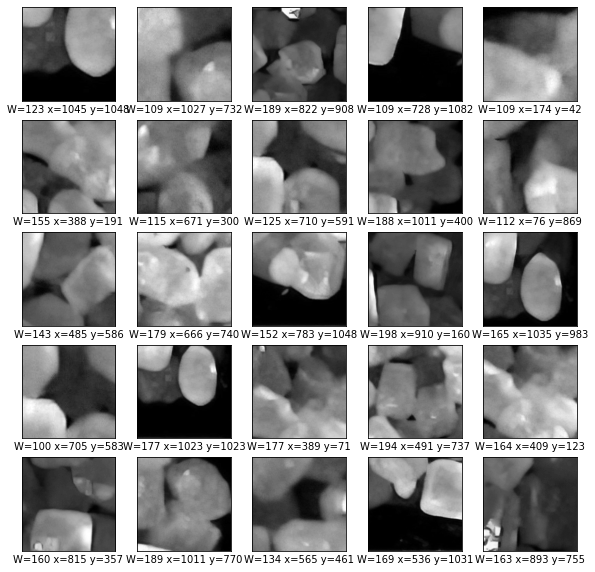

In [35]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


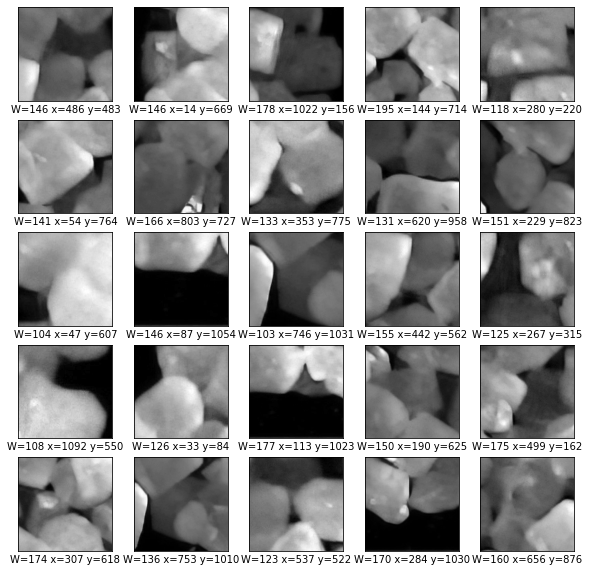

In [36]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i+25], cmap = "gray")
    plt.xlabel(label[i+25])
plt.show()

In [37]:
print(label)

['W=123 x=1045 y=1048', 'W=109 x=1027 y=732', 'W=189 x=822 y=908', 'W=109 x=728 y=1082', 'W=109 x=174 y=42', 'W=155 x=388 y=191', 'W=115 x=671 y=300', 'W=125 x=710 y=591', 'W=188 x=1011 y=400', 'W=112 x=76 y=869', 'W=143 x=485 y=586', 'W=179 x=666 y=740', 'W=152 x=783 y=1048', 'W=198 x=910 y=160', 'W=165 x=1035 y=983', 'W=100 x=705 y=583', 'W=177 x=1023 y=1023', 'W=177 x=389 y=71', 'W=194 x=491 y=737', 'W=164 x=409 y=123', 'W=160 x=815 y=357', 'W=189 x=1011 y=770', 'W=134 x=565 y=461', 'W=169 x=536 y=1031', 'W=163 x=893 y=755', 'W=146 x=486 y=483', 'W=146 x=14 y=669', 'W=178 x=1022 y=156', 'W=195 x=144 y=714', 'W=118 x=280 y=220', 'W=141 x=54 y=764', 'W=166 x=803 y=727', 'W=133 x=353 y=775', 'W=131 x=620 y=958', 'W=151 x=229 y=823', 'W=104 x=47 y=607', 'W=146 x=87 y=1054', 'W=103 x=746 y=1031', 'W=155 x=442 y=562', 'W=125 x=267 y=315', 'W=108 x=1092 y=550', 'W=126 x=33 y=84', 'W=177 x=113 y=1023', 'W=150 x=190 y=625', 'W=175 x=499 y=162', 'W=174 x=307 y=618', 'W=136 x=753 y=1010', 'W=1

In [0]:
#img = ww[0].reshape((28,28))
#ww[0].shape
#ww[0].size

In [39]:
'''
img=ww[0]
basewidth = 28 # MNIST image width
#img = Image.open('your_input_img.jpg')
wpercent = (basewidth/float(img.shape[0]))
hsize = int((float(img.shape[1])*float(wpercent)))
#img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img = img.resize((basewidth,hsize))
'''

"\nimg=ww[0]\nbasewidth = 28 # MNIST image width\n#img = Image.open('your_input_img.jpg')\nwpercent = (basewidth/float(img.shape[0]))\nhsize = int((float(img.shape[1])*float(wpercent)))\n#img = img.resize((basewidth,hsize), Image.ANTIALIAS)\nimg = img.resize((basewidth,hsize))\n"

In [40]:
print(np.array(ww[0]))

[[102 101 100 ...  69  59  42]
 [ 99 100 100 ...  73  64  49]
 [ 97 100  99 ...  74  71  55]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


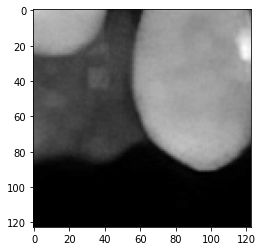

In [41]:
plt.imshow(ww[0], cmap = "gray")

In [42]:
'''
xw=[]
Size=28
for i in range(Num):
  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))
'''

'\nxw=[]\nSize=28\nfor i in range(Num):\n  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))\n'

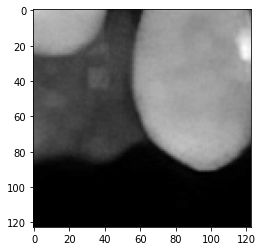

In [43]:

data=np.array(ww[0])
img = Image.fromarray(data.astype('uint8'), mode='L')
plt.imshow(img, cmap = "gray")


In [44]:
Size=28
xw=[]
# xw.append(cv2.resize(cv2.imread(img),(Size,Size)))
# xw.append(cv2.resize(img,(Size,Size)))
img=np.float32(img)
img=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
print(img)


[[9.77305222e+01 9.49846649e+01 9.24516602e+01 8.99482498e+01
  8.82606277e+01 8.82700119e+01 8.72550049e+01 8.40610123e+01
  7.24314880e+01 3.60265694e+01 2.11641884e+01 2.14433880e+01
  1.61181183e+01 1.52600307e+01 5.92298279e+01 7.53014755e+01
  7.85209274e+01 7.94559479e+01 8.09000549e+01 8.01096573e+01
  7.66790314e+01 7.62405396e+01 7.66186905e+01 7.73433762e+01
  7.87803574e+01 8.01689529e+01 7.75039368e+01 6.77247009e+01]
 [9.08335648e+01 8.98163147e+01 9.03480148e+01 8.86031494e+01
  8.69250488e+01 8.55239029e+01 8.21617508e+01 7.75770416e+01
  6.24427261e+01 2.86952229e+01 2.40049572e+01 2.65140438e+01
  2.17188835e+01 2.53390827e+01 6.75927048e+01 7.62132416e+01
  7.87053375e+01 7.93733292e+01 7.88577576e+01 7.65433960e+01
  7.19626541e+01 7.14942780e+01 7.32910385e+01 7.61990967e+01
  7.89400558e+01 7.96359253e+01 7.84837799e+01 7.85600510e+01]
 [8.67552414e+01 8.68870316e+01 8.83365021e+01 8.70333099e+01
  8.59627304e+01 8.46278076e+01 8.06780472e+01 7.23975143e+01
  5.27

In [49]:
# predictions = model.predict(xw[0])
#predictions = model.predict(img)
# predictions = model.predict(ww[0])
# result = model.evaluate(np.array(img))
#x=img
x=images28
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)

tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2 2 2 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 1 1 2 2 1 1 3 3 2 2 2 3 3 3 3 3 1 1
 1 1 2 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 3 2 3 3 3 3 3 3 3 1 1 1
 1 1 2 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 3 3 3 3 3 3 2 3 3 3 1 2 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 3 2 3 3 2 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2
 2 2 2 2 2 2 1 2 2 2 3 2 3 3 3 3 2 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 1 2 2 4 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 4 2 1 2 1 1 2 3
 3 2 3 2 3 3 3 3 1 2 1 1 1 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 1 1 1 1
 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 2 2 2 2 2 2 2 3 2 3 2 3 2 3 3 2 3 1 1 1 1 1
 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 3 3 2 2 3 3 3 2 3 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2
 2 2 4 1 1 1 2

In [50]:
print(images28.shape)

(882, 28, 28)


In [0]:
img.shape

In [0]:
28*28



In [0]:
img.size

In [0]:
#print(xw)